# 项目：巧克力数据集

## 简介

此数据集包含1700多块巧克力的专家评级，以及关于其地区来源、可可百分比、所用可可豆的种类和豆的种植地的信息。

变量含义：
- `Company`：巧克力生产公司名称
- `Specific Bean Originor Bar Name`：巧克力起源的特定区域
- `REF`：判断评价输入数据库的时间的值，Higher = 最近
- `ReviewDate`：评论发表日期
- `CocoaPercent`：可可含量百分比
- `CompanyLocation`：制造商所在的区域
- `Rating`：评分。巧克力棒的专业评分
- `BeanType`：使用的可可豆的品种
- `BeanOrigin`：可可豆的原产地

## **读取数据**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv("./flavors_of_cacao.csv")

In [3]:
original_data.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


## **评估和清理数据**

In [4]:
cleaned_data = original_data.copy()

In [5]:
cleaned_data.columns = cleaned_data.columns.str.replace(r'\n', '', regex=True)
cleaned_data.columns = cleaned_data.columns.str.replace(r'\(.*?\)', '', regex=True).str.strip()
cleaned_data = cleaned_data.rename(columns={"Broad BeanOrigin":"BeanOrigin"})

In [6]:
# 将ReviewDate转换为时间格式
cleaned_data['ReviewDate'] = pd.to_datetime(cleaned_data['ReviewDate'], format='%Y')
# 去掉 "%" 符号，并将CocoaPercent列转换为浮点型
cleaned_data['CocoaPercent'] = cleaned_data['CocoaPercent'].str.replace('%', '').astype(float)

In [7]:
cleaned_data.head()

,Company,Specific Bean Originor Bar Name,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BeanOrigin
0,A. Morin,Agua Grande,1876,2016-01-01,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015-01-01,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015-01-01,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015-01-01,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015-01-01,70.0,France,3.50,,Peru


In [8]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Company                          1795 non-null   object        
 1   Specific Bean Originor Bar Name  1795 non-null   object        
 2   REF                              1795 non-null   int64         
 3   ReviewDate                       1795 non-null   datetime64[ns]
 4   CocoaPercent                     1795 non-null   float64       
 5   CompanyLocation                  1795 non-null   object        
 6   Rating                           1795 non-null   float64       
 7   BeanType                         1794 non-null   object        
 8   BeanOrigin                       1794 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 126.3+ KB


## **数据分析**

### 1 描述性统计分析

In [9]:
# 评分的描述性统计
print(cleaned_data['Rating'].describe())

count    1795.000000
mean        3.185933
std         0.478062
min         1.000000
25%         2.875000
50%         3.250000
75%         3.500000
max         5.000000
Name: Rating, dtype: float64


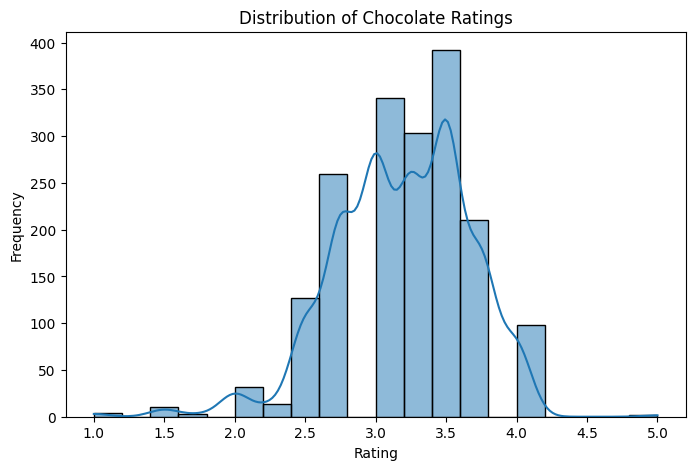

In [10]:
# 绘制评分的分布直方图
plt.figure(figsize=(8, 5))
sns.histplot(cleaned_data['Rating'], bins=20, kde=True)
plt.title('Distribution of Chocolate Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [11]:
# 可可含量的描述性统计
print(cleaned_data['CocoaPercent'].describe())

count    1795.000000
mean       71.698329
std         6.323118
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       100.000000
Name: CocoaPercent, dtype: float64


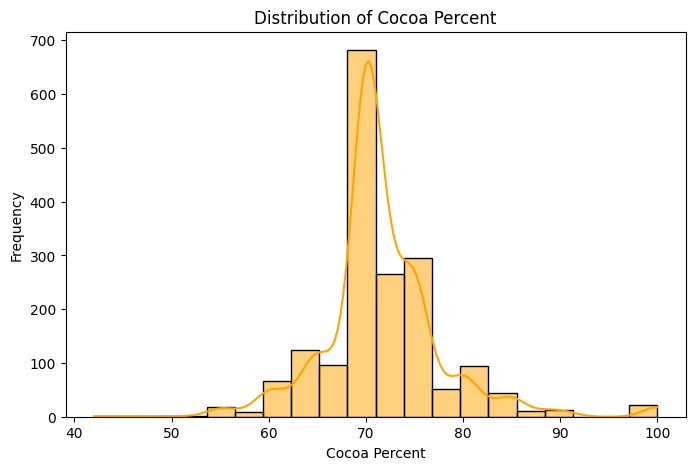

In [12]:
# 绘制可可百分比的分布
plt.figure(figsize=(8, 5))
sns.histplot(cleaned_data['CocoaPercent'], bins=20, kde=True, color='orange')
plt.title('Distribution of Cocoa Percent')
plt.xlabel('Cocoa Percent')
plt.ylabel('Frequency')
plt.show()

### 2 关系分析

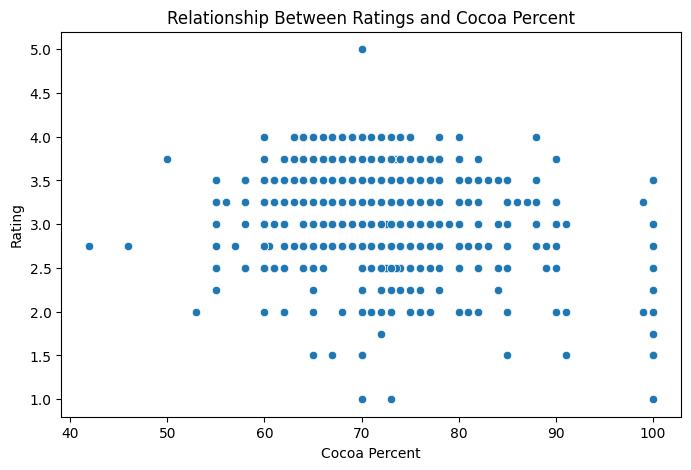

In [13]:
# 评分与可可百分比的散点图
plt.figure(figsize=(8, 5))
sns.scatterplot(x='CocoaPercent', y='Rating', data=cleaned_data)
plt.title('Relationship Between Ratings and Cocoa Percent')
plt.xlabel('Cocoa Percent')
plt.ylabel('Rating')
plt.show()

In [14]:
# 计算相关性
correlation = cleaned_data[['CocoaPercent', 'Rating']].corr()
print("Correlation between Cocoa Percent and Rating:\n", correlation)

Correlation between Cocoa Percent and Rating:
               CocoaPercent   Rating
CocoaPercent       1.00000 -0.16482
Rating            -0.16482  1.00000


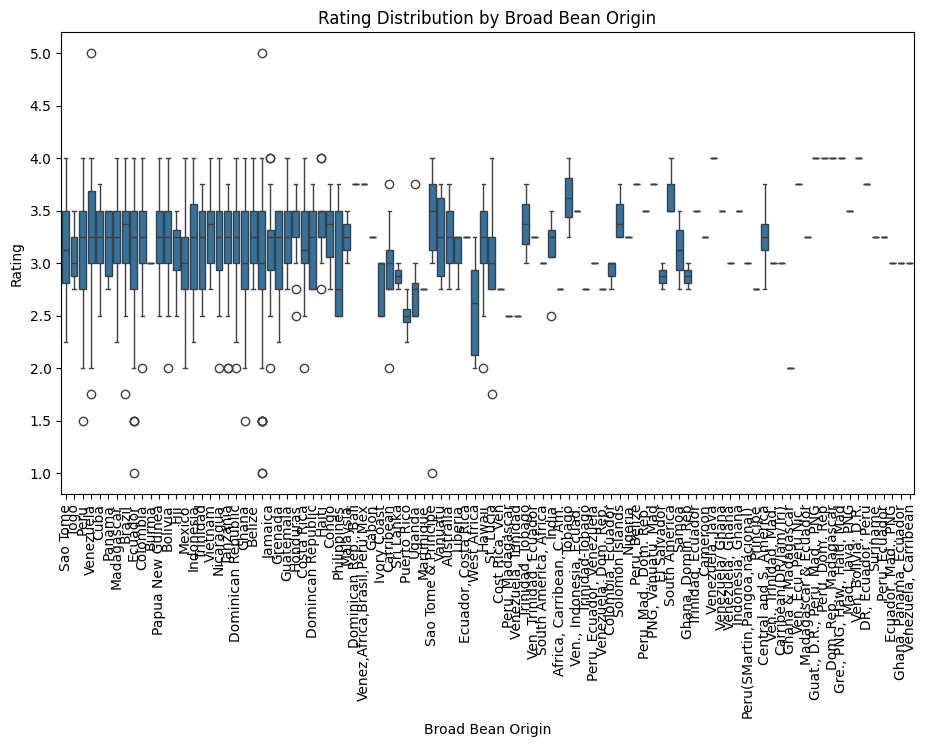

In [15]:
# 绘制不同可可豆原产地的评分箱线图
plt.figure(figsize=(11, 6))
sns.boxplot(x='BeanOrigin', y='Rating', data=cleaned_data)
plt.title('Rating Distribution by Broad Bean Origin')
plt.xlabel('Broad Bean Origin')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

### 3 时序分析

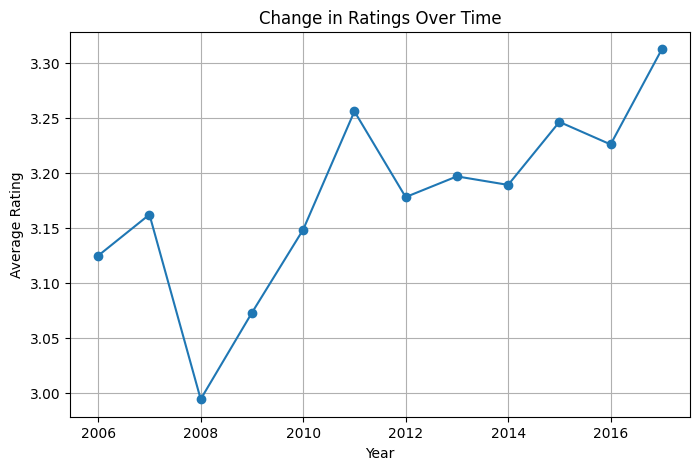

In [16]:
# 按年计算平均评分
yearly_ratings = cleaned_data.groupby(cleaned_data['ReviewDate'].dt.year)['Rating'].mean()

# 绘制评分随时间的变化
plt.figure(figsize=(8, 5))
yearly_ratings.plot(marker='o')
plt.title('Change in Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

### 4 类别数据的可视化

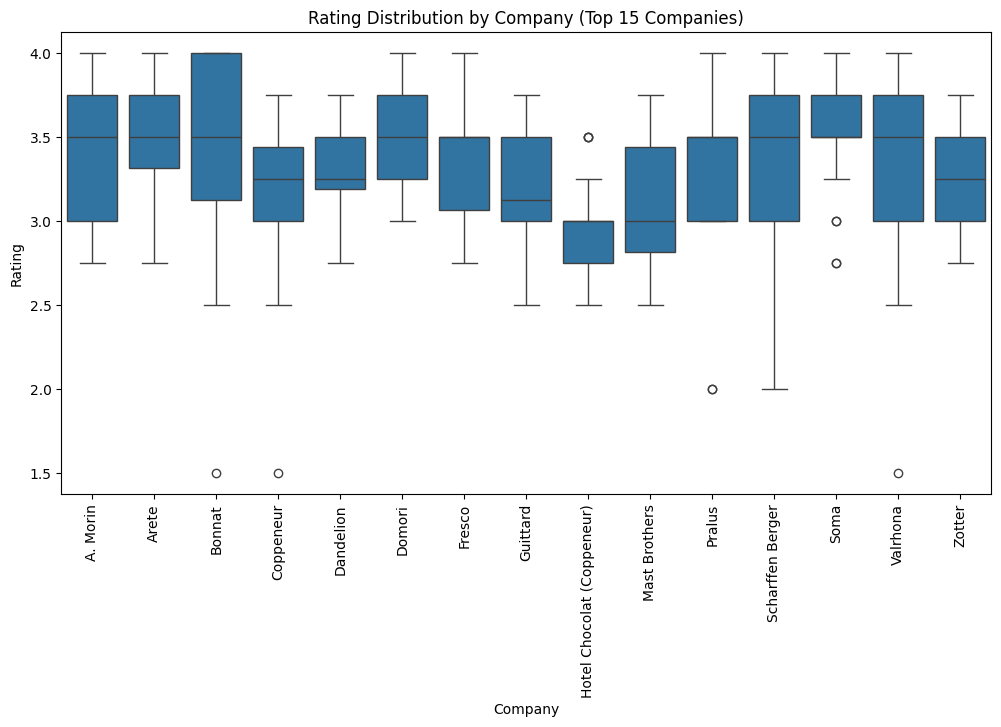

In [17]:
# 绘制不同公司评分的箱线图（只显示前15家公司）
top_companies = cleaned_data['Company'].value_counts().nlargest(15).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company', y='Rating', data=cleaned_data[cleaned_data['Company'].isin(top_companies)])
plt.title('Rating Distribution by Company (Top 15 Companies)')
plt.xlabel('Company')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

### 回归分析

均方误差: 0.23146324101198754


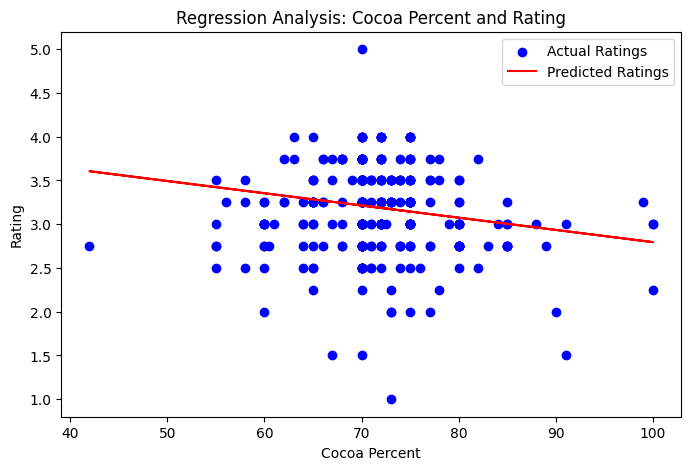

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 选择特征和目标变量
X = cleaned_data[['CocoaPercent']]  # 只用可可含量作为特征
y = cleaned_data['Rating']

# 分割训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f'均方误差: {mse}')

# 可视化回归结果
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual Ratings')
plt.plot(X_test, y_pred, color='red', label='Predicted Ratings')
plt.title('Regression Analysis: Cocoa Percent and Rating')
plt.xlabel('Cocoa Percent')
plt.ylabel('Rating')
plt.legend()
plt.show()